In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap
from sklearn.manifold import TSNE
import warnings
import re
import random
import ast
warnings.filterwarnings("ignore")

Smarter Step Separation

In [4]:
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

In [6]:
for i in range(20):
    print("EXAMPLE ", i)
    print(gsm_df['CoT Response'][random.randint(0, 49)])

EXAMPLE  0
1. The cost of the wallet is $100.
2. Betty has only half of the money she needs, which is $100/2 = $50.
3. Betty's parents give her $15, so she now has $50 + $15 = $65.
4. Betty's grandparents give her twice as much as her parents, so they give her $15 x 2 = $30.
5. Adding the money from her grandparents, Betty now has $65 + $30 = $95.
6. To find out how much more money Betty needs, we subtract the amount she already has from the cost of the wallet: $100 - $95 = $5.
7. Therefore, Betty needs $5 more to buy the wallet.
EXAMPLE  1
First, let's calculate how many clips Natalia sold in May. We know that she sold half as many clips in May as she did in April. So, we can find this by dividing the number of clips she sold in April by 2.

48 clips / 2 = 24 clips

Therefore, Natalia sold 24 clips in May.

Now, let's calculate how many clips she sold altogether in April and May. We can find this by adding the number of clips she sold in April and the number of clips she sold in May.


Original Experimentation

In [ ]:
import ast
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
cot_sentences_ex = gsm_df['CoT Sentences'][0]
cot_sentences_ex

In [ ]:
embeddings = []
for i in range(5):
    question = gsm_df['Prompt'][i]
    cot_reasoning = gsm_df['CoT Sentences'][i]
    cot_reasoning.insert(0, question)
    # print(cot_reasoning)
    cot_embeddings = model.encode(cot_reasoning)
    print('Length of Embeddings (with question): ', len(cot_embeddings))
    # print(cot_embeddings)
    embeddings.append(cot_embeddings)
print(embeddings)

In [ ]:
gsm_df.head()

Embedding Visualization

In [ ]:
class two_dimensional_viz:
    def __init__(self, cot_embeddings):
        self.cot_embeddings = cot_embeddings
        
    def pca(self):
        pca = PCA(n_components=2)
        reduced_embeddings = pca.fit_transform(self.cot_embeddings)

        indices = np.arange(len(self.cot_embeddings))
        colormap = plt.cm.viridis
        colors = colormap(indices / max(indices))  # Still need to scale for the colormap
        

        plt.figure(figsize=(5, 5))
        scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=colors)

        for i in range(len(reduced_embeddings) - 1):
            plt.plot(reduced_embeddings[i:i+2, 0], reduced_embeddings[i:i+2, 1], color='grey', alpha=0.5)

        cbar = plt.colorbar(scatter, label='Index in Embeddings Array')
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['0', str(len(cot_embeddings)-1)])
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title('2D Visualization of Embeddings using PCA')

        plt.show()
    
    def umap(self):
        reducer = umap.UMAP()
        umap_embeddings = reducer.fit_transform(self.cot_embeddings)

        indices = np.arange(len(umap_embeddings))

        plt.figure(figsize=(5, 5))
        plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=indices, cmap='viridis', s=15) # s is the size of the dots
        plt.colorbar(label='Index of Embedding')

        for i in range(len(umap_embeddings)-1):
            plt.plot(umap_embeddings[i:i+2, 0], umap_embeddings[i:i+2, 1], color='grey', alpha=0.5) # alpha controls the transparency

        plt.gca().set_aspect('equal', 'datalim')
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title('2D Visualization of Embeddings using UMAP', fontsize=12)
        plt.show()

    def tsne(self):
        tsne = TSNE(n_components=2)
        tsne_embeddings = tsne.fit_transform(self.cot_embeddings)

        indices = np.arange(len(tsne_embeddings))
        plt.figure(figsize=(5, 5))

        plt.scatter(tsne_embeddings[:, 0], tsne_embeddings[:, 1], c=indices, cmap='viridis', s=15) # s is the size of the dots
        plt.colorbar(label='Index of Embedding')

        for i in range(len(tsne_embeddings)-1):
            plt.plot(tsne_embeddings[i:i+2, 0], tsne_embeddings[i:i+2, 1], color='grey', alpha=0.5) # alpha controls the transparency

        plt.gca().set_aspect('equal', 'datalim')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.title('2D Visualization of Embeddings using t-SNE', fontsize=12)
        plt.show()



In [ ]:
class three_dimensional_viz:
    def __init__(self, cot_embeddings):
        self.cot_embeddings = cot_embeddings
        
    def pca(self):
        pca_3d = PCA(n_components=3)
        reduced_embeddings_3d = pca_3d.fit_transform(self.cot_embeddings)
        colormap = plt.cm.viridis
        indices = np.arange(len(self.cot_embeddings))
        colors_non_normalized = colormap(indices / max(indices))

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], c=colors_non_normalized)
        for i in range(len(reduced_embeddings_3d) - 1):
            ax.plot(reduced_embeddings_3d[i:i+2, 0], reduced_embeddings_3d[i:i+2, 1], reduced_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)

        cbar = plt.colorbar(scatter, label='Index in Embeddings Array')
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['0', str(len(cot_embeddings)-1)])
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title('3D Visualization of Embeddings using PCA')

        plt.show()
        
    def umap(self):
        reducer = umap.UMAP(n_components=3)
        umap_embeddings_3d = reducer.fit_transform(self.cot_embeddings)

        indices = np.arange(len(umap_embeddings_3d))

        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(umap_embeddings_3d[:, 0], umap_embeddings_3d[:, 1], umap_embeddings_3d[:, 2], c=indices, cmap='viridis', s=15)

        for i in range(len(umap_embeddings_3d)-1):
            ax.plot(umap_embeddings_3d[i:i+2, 0], umap_embeddings_3d[i:i+2, 1], umap_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)

        plt.colorbar(scatter, ax=ax, label='Index of Embedding')
        ax.set_xlabel('UMAP Component 1')
        ax.set_ylabel('UMAP Component 2')
        ax.set_zlabel('UMAP Component 3')
        plt.title('3D Visualization of Embeddings using UMAP', fontsize=12)
        plt.show()


    def tsne(self):
        tsne = TSNE(n_components=3)
        tsne_embeddings_3d = tsne.fit_transform(self.cot_embeddings)

        indices = np.arange(len(tsne_embeddings_3d))

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(tsne_embeddings_3d[:, 0], tsne_embeddings_3d[:, 1], tsne_embeddings_3d[:, 2], c=indices, cmap='viridis', s=15)

        for i in range(len(tsne_embeddings_3d)-1):
            ax.plot(tsne_embeddings_3d[i:i+2, 0], tsne_embeddings_3d[i:i+2, 1], tsne_embeddings_3d[i:i+2, 2], color='grey', alpha=0.5)

        plt.colorbar(scatter, ax=ax, label='Index of Embedding')
        ax.set_xlabel('t-SNE Component 1')
        ax.set_ylabel('t-SNE Component 2')
        ax.set_zlabel('t-SNE Component 3')
        plt.title('3D Visualization of Embeddings using t-SNE', fontsize=12)
        plt.show()



In [ ]:
for emb in embeddings:
    viz = two_dimensional_viz(emb)
    viz.pca() # viz.tsne() or viz.umap()

In [ ]:
for emb in embeddings:
    viz = three_dimensional_viz(emb)
    viz.pca() # viz.tsne() or viz.umap()

Trace Metric Exploration

In [ ]:
cot_response_ex = gsm_df['CoT Response'][49]
cot_response_ex

In [ ]:
import random

In [ ]:
for i in range(10):
    print(gsm_df['CoT Response'][random.randint(0, 49)])

In [ ]:
def split_reasoning_trace(trace):
    # Regular expression to match patterns like "1.", "2.", "Step 1:", "First,", "Next,", "Then,", "Finally,"
    step_pattern = re.compile(r'\b(?:Step\s\d+|First,|Next,|Then,|Finally,|\d+\.)')
    steps = step_pattern.split(trace)
    steps = [step.strip() for step in steps if step.strip()]
    
    return steps

Full PCA Visualizations

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import umap
from sklearn.manifold import TSNE
import warnings
import re
import random
warnings.filterwarnings("ignore")

from embedding_vis import DimensionalViz
from embedding_vis import cot_step_print

In [2]:
import ast
gsm_df = pd.read_csv('data/cot_data_50_start_sentences.csv')
gsm_df['CoT Sentences'] = gsm_df['CoT Sentences'].apply(ast.literal_eval)

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

embeddings = []
for i in range(50):
    question = gsm_df['Prompt'][i]
    cot_reasoning = gsm_df['CoT Sentences'][i]
    cot_reasoning.insert(0, question)
    cot_embeddings = model.encode(cot_reasoning)
    print('Length of Embeddings (with question): ', len(cot_embeddings))
    embeddings.append(cot_embeddings)

Length of Embeddings (with question):  8
Length of Embeddings (with question):  5
Length of Embeddings (with question):  15
Length of Embeddings (with question):  11
Length of Embeddings (with question):  5
Length of Embeddings (with question):  14
Length of Embeddings (with question):  11
Length of Embeddings (with question):  10
Length of Embeddings (with question):  5
Length of Embeddings (with question):  13
Length of Embeddings (with question):  9
Length of Embeddings (with question):  13
Length of Embeddings (with question):  7
Length of Embeddings (with question):  13
Length of Embeddings (with question):  10
Length of Embeddings (with question):  16
Length of Embeddings (with question):  5
Length of Embeddings (with question):  17
Length of Embeddings (with question):  13
Length of Embeddings (with question):  11
Length of Embeddings (with question):  8
Length of Embeddings (with question):  8
Length of Embeddings (with question):  9
Length of Embeddings (with question):  11
Le

In [3]:
viz_2d = DimensionalViz(embeddings)

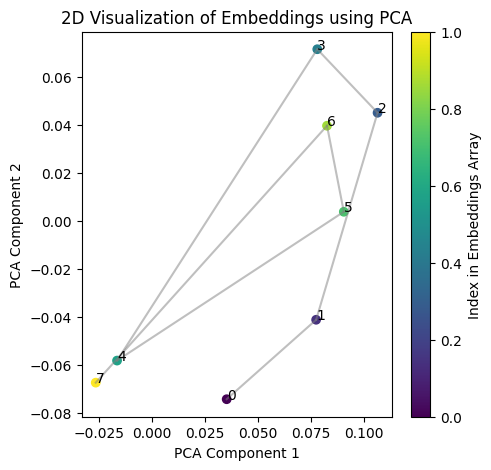

In [5]:
# cot_step_print(gsm_df['CoT Sentences'][0])
# labels = gsm_df['CoT Sentences'][0]
labels = [str(i) for i in range(len(gsm_df['CoT Sentences'][0]))]
viz_2d.pca(embeddings[0], cot_strings=labels, connections=True, str_labels=True)

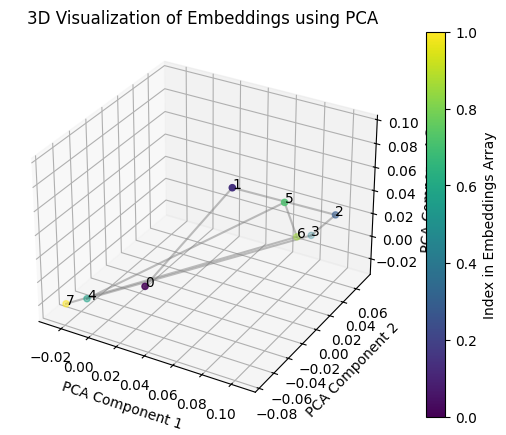

In [6]:
viz_3d = DimensionalViz(embeddings, vis_dimensions=3)
labels = [str(i) for i in range(len(gsm_df['CoT Sentences'][0]))]
# labels = gsm_df['CoT Sentences'][0]

viz_3d.pca(embeddings[0], cot_strings=labels, connections=True, str_labels=True)

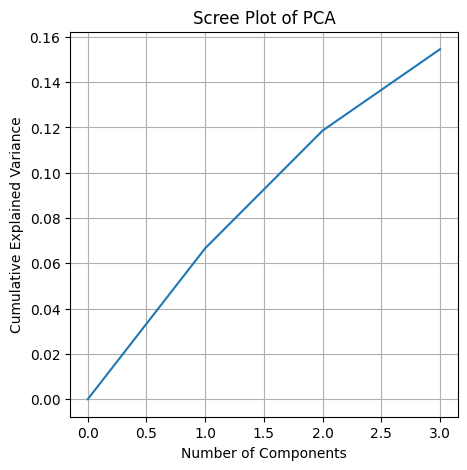

In [7]:
viz_3d.scree_plot()

In [8]:
all_sentences = [sentence for sublist in gsm_df['CoT Sentences'].tolist() for sentence in sublist]
viz_und = DimensionalViz(all_embeddings=None, vis_dimensions=3, model=model, all_sentences=all_sentences)

In [11]:
viz_und.understand_pcs(pc_num=3)

Sentences with highest projections on PC3:
TOP  0
2.
TOP  1
2.
TOP  2
3.
TOP  3
3.
TOP  4
3.

Sentences with lowest projections on PC3:
BOTTOM  0
Each hand has 9 bananas, so the total number of bananas in these piles is 120 x 9 = 1080 bananas.
BOTTOM  1
Each hand has 14 bananas, so the total number of bananas in these piles is 54 x 14 = 756 bananas.
BOTTOM  2
There are 10 piles with 12 hands each, so the total number of hands is 10 x 12 = 120 hands.
BOTTOM  3
To find the number of students who got a final grade below B, we multiply the total number of students by the percentage who got a grade below B.
BOTTOM  4
To find the number of deleted files, we multiply 800 by 70% (or 0.70): 800 * 0.70 = 560 files deleted.
